# Student Data Base

# Summarization


## 7 Stages of ML
1. Data Collection
2. Data Preparation
3. Choose Model
4. Train Model
5. Evaluate Model
6. Improve Model
7. Predict Model

# Introduction

# Problem Statement

## In this regression task we will predict the percentage of an student based on the no. of study hours. This is a simple linear regression task as it involves just 2 variables.

# Importing Packages

## Importing and Installing Libraries

In [81]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style='whitegrid', font_scale = 1.3, color_codes=True)
from sklearn.preprocessing import LabelEncoder

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [82]:
# Importing training dataset using pd.read_csv

url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")


Data imported successfully


In [83]:
# to have a quick glance of data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [84]:
#to identify null, missing data and the type of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<span style='background:orange'>Observation:There are 25 rows, 2 columns

In [85]:
#listing the column names, so it is easy to copy paste later during Train/test data
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [86]:
# to find the shape of the data, though seen in the .info() , double checking here
df.shape

(25, 2)

<span style='background:orange'>Observation:As seen above in .info() we have 25 rows and 2 columns</span>

In [87]:
# to check for the null values. Already checked in .info(), double checking here
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<span style='background:orange'> Observation: There is no null data </span>

In [88]:
# Information about the data to describe the major attributes
df.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [89]:
# Handling Duplciate Rows
df[df.duplicated(keep='first')].shape

(0, 2)

## Summary Of the Data
- We have 25 rows and 2 columns. 
- 1 column is the name of the Scores (Integer data type)
- 1 column is the name of the Hours (Float data type)
- There is no missing or null data
- There is no duplicate row

# EDA (Exploratory Data Analysis)

## Let us analyze and see the Boxplot

<function matplotlib.pyplot.show(close=None, block=None)>

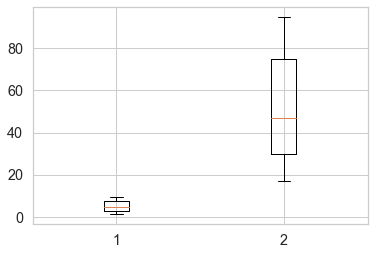

In [90]:

plt.boxplot(df)
plt.show

## Let us analyze the Study Hours using Bar Chart

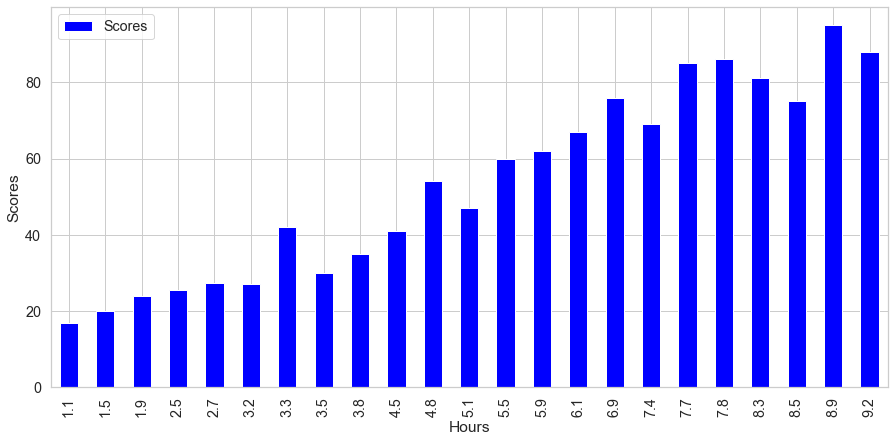

In [91]:
study_Hours= df.pivot_table(index="Hours",values="Scores",aggfunc=np.median)

study_Hours.plot(kind='bar' ,color='blue',figsize=(15,7))
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

## Scatter plot showing the analyzation

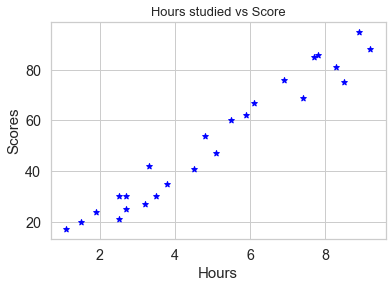

In [92]:
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score' ,fontsize=13)
plt.scatter(df.Hours,df.Scores,color='blue',marker='*')
plt.show()

<span style='background:orange'> Observation: There is a positive linear relation between the number of hours studied and percentage of score. Number of study hours increases, corresponding scores also increases </span> 

## Correlation

We can corelate the data using heatmap (visual form) and in a tabular form as well, to sort the data easily

In [93]:
dfcor=df.corr()
dfcor

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Visual Form (Heatmap)

<AxesSubplot:>

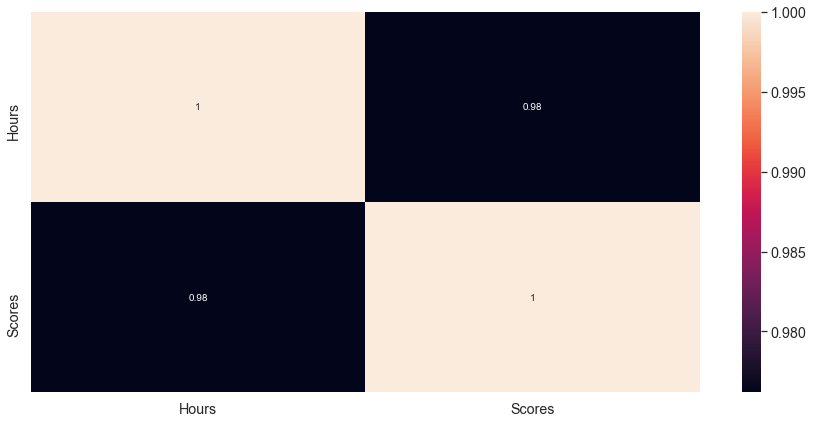

In [94]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

<span style='background:orange'> Observation: The darker shades of the chart represent higher values than the lighter shade </span> 

# Train & Test Data

## Spliting the target value

In [95]:
X=df.iloc[:,:1].values
Y=df.iloc[:,1:].values

## Splitting Train and Test data

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.3)

In [97]:
# Lets review the Train and Test data
print("X_Train_Shape:",x_train.shape, "X_Test_Shape:",x_test.shape)
print("Y_Train_Shape:",y_train.shape, "Y_Test_Shape:",y_test.shape)

X_Train_Shape: (17, 1) X_Test_Shape: (8, 1)
Y_Train_Shape: (17, 1) Y_Test_Shape: (8, 1)


# Linear Regression Algorithm

In [98]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [99]:
regressor.fit(x_train, y_train)

LinearRegression()

## Train Data

In [100]:
line = regressor.coef_*X + regressor.intercept_

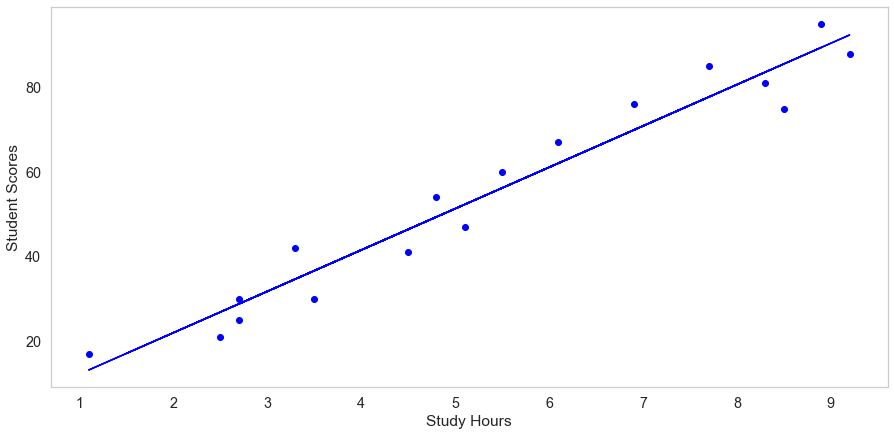

In [101]:
plt.rcParams['figure.figsize'] = [15,7]
plt.scatter(x_train, y_train, color='blue')
plt.plot(X, line, color='blue');
plt.xlabel('Study Hours')
plt.ylabel('Student Scores')
plt.grid()
plt.show()

## Test Data

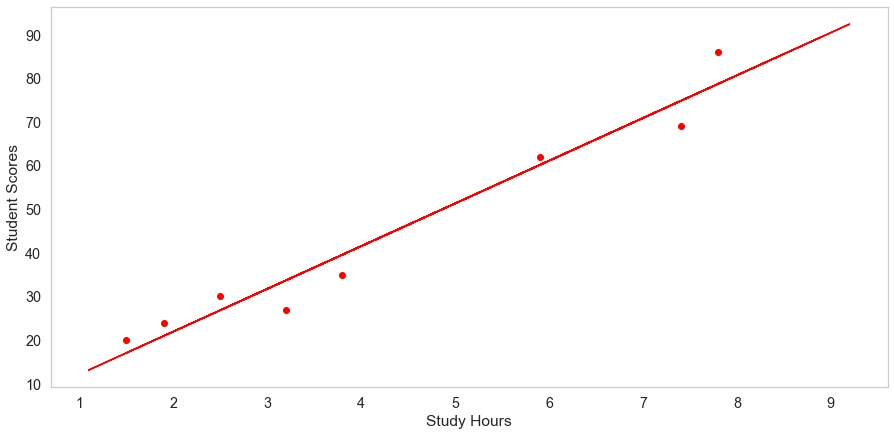

In [102]:
plt.rcParams['figure.figsize'] = [15,7]
plt.scatter(x_test, y_test, color='Red')
plt.plot(X, line, color='Red');
plt.xlabel('Study Hours')
plt.ylabel('Student Scores')
plt.grid()
plt.show()

## Score Prediction

In [103]:
print(x_test)
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [104]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62],
       [35],
       [24],
       [86]], dtype=int64)

In [105]:
y_pred

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [106]:
Data = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred]})
Data

,Actual,Predicted
0,"[[20], [27], [69], [30], [62], [35], [24], [86]]","[[17.05366541246545], [33.69422877993883], [74..."


# What will be predicted score if a student studies for 9.25 hrs/ day?

In [107]:
hours = 9.25
pred = regressor.predict([[hours]])
print('The predicted score if a person studies for',hours, 'hours is', pred[0])

The predicted score if a person studies for 9.25 hours is [92.91505723]


<span style='background:orange'> Observation: The predicted score if a person studies for 9.25 hours would be 92.91505723 </span> 

# Evaluating the Model

- This step is to evaluate the performance of algorithm. This step is particularly important to compare different algorithms performance on a particular dataset. For simplicity here, we have choosen the mean square error. 

In [108]:
from sklearn import metrics
print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.419727808027652
